<a href="https://colab.research.google.com/github/AvantiShri/gcp_analysis_rough/blob/main/cleaner/BulkAnalyze_compare_sumz_squared_to_sum_zsquared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import scipy

In [2]:
def compare_different_calc_approaches(egg_values):
  #Radin 2023 (Anomalous entropic effects in physical systems associated
  # with collective consciousness) said "All individual samples within a matrix
  # less than 55 or greater than 145 were set to nan" so we do that here
  egg_values = np.where((egg_values < 55), np.nan, egg_values)
  egg_values = np.where((egg_values > 145), np.nan, egg_values)

  num_nonnan_eggs = np.sum(np.isnan(egg_values)==False, axis=1) #get the number of non NaN eggs per row

  egg_zscores = (egg_values - 100)/np.sqrt(50)
  sumz_toz_squared = np.square(np.nansum(egg_zscores, axis=1)/np.sqrt(num_nonnan_eggs))
  sum_zsquared = np.nansum(np.square(egg_zscores), axis=1)

  sum_sumz_toz_squared = np.sum(sumz_toz_squared)
  df_sum_sumz_squared_toz = len(egg_values)
  pval_sum_sumz_toz_squared = 1-scipy.stats.chi2.cdf(x=sum_sumz_toz_squared, df=df_sum_sumz_squared_toz) #the usual p value

  sum_sum_zsquared = np.sum(sum_zsquared)
  df_sum_sum_zsquared = np.sum(num_nonnan_eggs)
  pval_sum_sum_zsquared = 1-scipy.stats.chi2.cdf(x=sum_sum_zsquared, df=df_sum_sum_zsquared)

  return (pval_sum_sumz_toz_squared, pval_sum_sum_zsquared)

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json
event_metadata_list = json.load(open("/content/drive/MyDrive/GCP_data/event_metadata_list.json"))

In [11]:
%matplotlib inline

import glob
import json
import numpy as np
import scipy
import os
from matplotlib import pyplot as plt

%cd /content/drive/MyDrive/GCP_data/

event_count = 0

all_pvals_from_different_approaches = []

for (event, event_name, pval) in event_metadata_list[:]:

  event_count += 1
  print("\n--------------------------------")
  print("Event Count:",event_count,event,event_name,pval)

  egg_values_test = np.load("extracted/"+event+"_test_eggvalues.npy")
  pvals_different_calc_approaches = compare_different_calc_approaches(egg_values_test)
  print(pvals_different_calc_approaches)
  all_pvals_from_different_approaches.append(pvals_different_calc_approaches)



/content/drive/MyDrive/GCP_data

--------------------------------
Event Count: 1 Event391 Internat Day Peace 0.0008192443394802185
(0.0008598426918996482, 0.18189365013767334)

--------------------------------
Event Count: 2 Event289 Meditations Valentines Day 0.002569859448349643
(0.0026575696525655834, 0.47128563441626625)

--------------------------------
Event Count: 3 Event487 September 21 0.003153268038066148
(0.003252951555369199, 0.8959462155130954)

--------------------------------
Event Count: 4 Event217 Indonesian Earthquake 0.0032705236405630167
(0.003447763617020816, 0.19540564942502647)

--------------------------------
Event Count: 5 Event203 Baghdad Bridge Stampede 0.007938503795130725
(0.00830796658172206, 0.9996400914764396)

--------------------------------
Event Count: 6 Event472 Mandela Dies 0.008229306940944703
(0.008400799531767422, 0.940629804700795)

--------------------------------
Event Count: 7 Event360 Brazilian Mudslides 0.012434298335079697
(0.01264255374

Meta-analysis on sum(sumz_toz_squared) 6.179826203457219
Meta-analysis on sum(sum_zsquared) 5.476107676012489


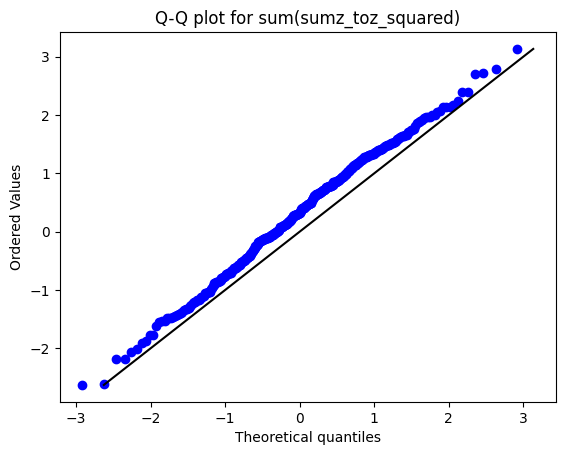

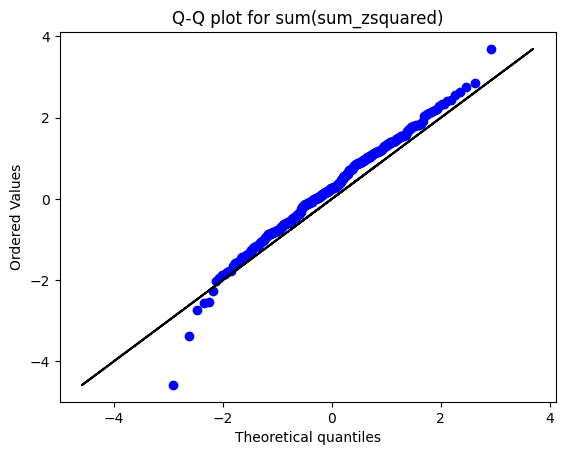

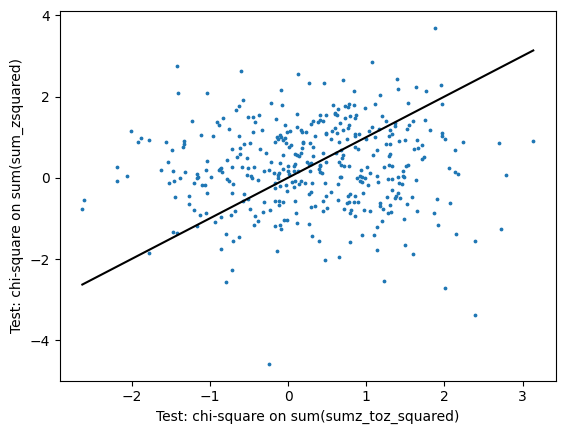

In [25]:
from matplotlib import pyplot as plt

pval_to_zscores_1 = np.array([scipy.stats.norm.ppf(1-x[0]) for x in all_pvals_from_different_approaches])
pval_to_zscores_2 = np.array([scipy.stats.norm.ppf(1-x[1]) for x in all_pvals_from_different_approaches])

print("Meta-analysis on sum(sumz_toz_squared)", np.sum(pval_to_zscores_1)/np.sqrt(len(pval_to_zscores_1)))
print("Meta-analysis on sum(sum_zsquared)", np.sum(pval_to_zscores_2)/np.sqrt(len(pval_to_zscores_2)))

scipy.stats.probplot(pval_to_zscores_1, dist=scipy.stats.norm, fit=False, plot=plt)
plt.plot(pval_to_zscores_1, pval_to_zscores_1, color="black")
plt.title("Q-Q plot for sum(sumz_toz_squared)")
plt.show()
scipy.stats.probplot(pval_to_zscores_2, dist=scipy.stats.norm, fit=False, plot=plt)
plt.plot(pval_to_zscores_2, pval_to_zscores_2, color="black")
plt.title("Q-Q plot for sum(sum_zsquared)")
plt.show()


plt.scatter(pval_to_zscores_1, pval_to_zscores_2, s=3)
plt.plot(pval_to_zscores_1, pval_to_zscores_1, color="black")
plt.xlabel("Test: chi-square on sum(sumz_toz_squared)")
plt.ylabel("Test: chi-square on sum(sum_zsquared)")
plt.show()